# Setup 

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import json
import pandas as pd

In [3]:
ROOT_DIR = '../../'
import sys
sys.path.insert(0, ROOT_DIR)

import eval_utils

## Define models to eval 

In [4]:
EVAL_DATASET = 'rf-uniform'
MODEL_TYPE = 'contextual'

In [5]:
eval_results = eval_utils.load_eval_results(EVAL_DATASET, MODEL_TYPE, listener_types=['val'])

# Vocab Distribution 

In [6]:
listener_type = 'val' # pick 'val' since there's only one val listener regardless of speaker type; when there are multiple listeners there are nested dicts in `eval_results`
vocab_dist = [eval_utils.analyze_vocab_dist(curr_speaker_results[listener_type], curr_speaker_results['all_referents']) for curr_speaker_results in eval_results]

In [7]:
dist_per_speaker = [vocab_dist_per_speaker['utterance_type'] for vocab_dist_per_speaker in vocab_dist]

<AxesSubplot:ylabel='Proportion'>

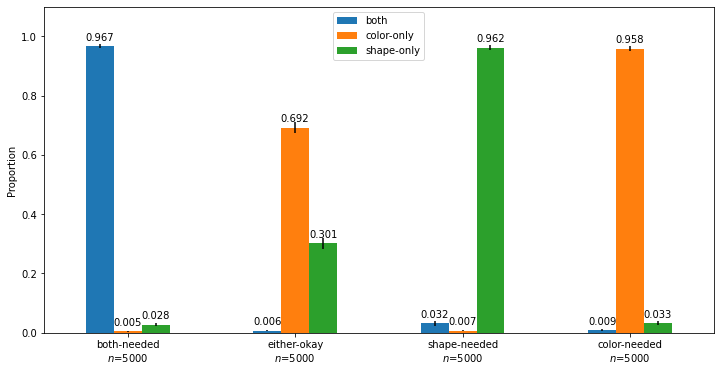

In [8]:
eval_utils.visualize_utterance_distribution(dist_per_speaker)

### When target is red circle

<AxesSubplot:ylabel='Proportion'>

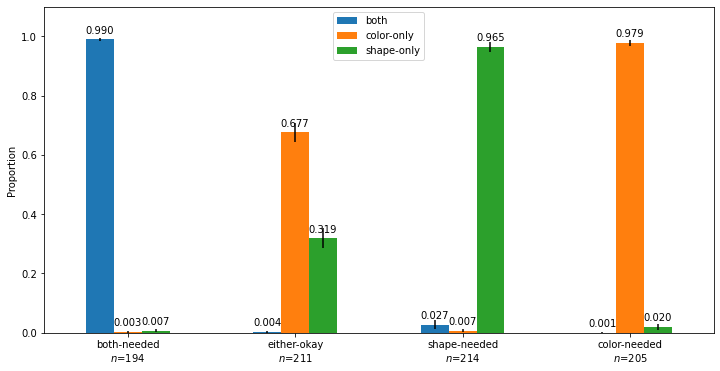

In [9]:
red_circle_dist = [eval_utils.analyze_vocab_dist(curr_speaker_results[listener_type], curr_speaker_results['all_referents'], lambda x: x[0] == 'red' and x[1] == 'circle') for curr_speaker_results in eval_results]
red_circle_dist_per_speaker = [vocab_dist_per_speaker['utterance_type'] for vocab_dist_per_speaker in red_circle_dist]
eval_utils.visualize_utterance_distribution(red_circle_dist_per_speaker)

### Target is non-red circle 

<AxesSubplot:ylabel='Proportion'>

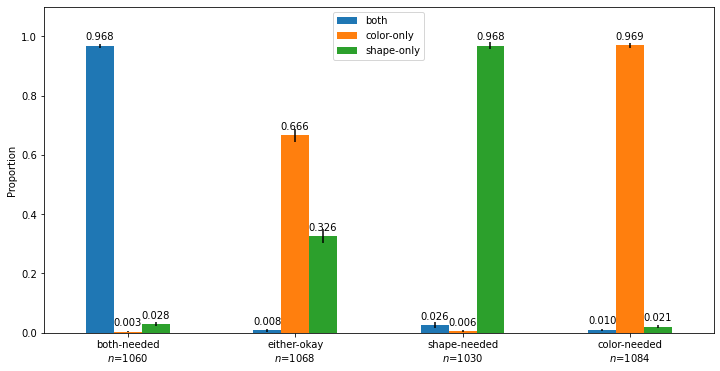

In [10]:
nonred_circle_dist = [eval_utils.analyze_vocab_dist(curr_speaker_results[listener_type], curr_speaker_results['all_referents'], lambda x: x[0] != 'red' and x[1] == 'circle') for curr_speaker_results in eval_results]
nonred_circle_dist_per_speaker = [vocab_dist_per_speaker['utterance_type'] for vocab_dist_per_speaker in nonred_circle_dist]
eval_utils.visualize_utterance_distribution(nonred_circle_dist_per_speaker)

### Target is red non-circle 

<AxesSubplot:ylabel='Proportion'>

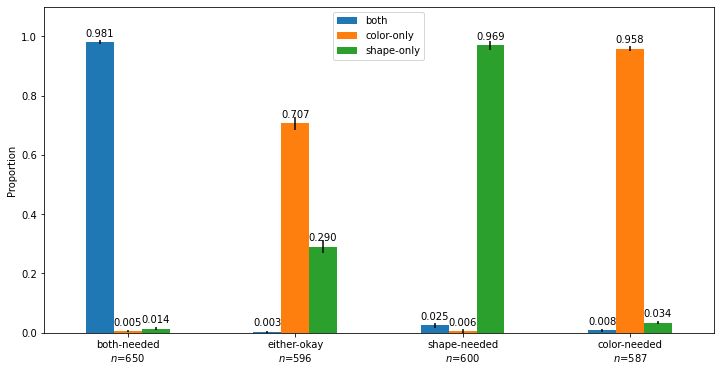

In [11]:
red_noncircle_dist = [eval_utils.analyze_vocab_dist(curr_speaker_results[listener_type], curr_speaker_results['all_referents'], lambda x: x[0] == 'red' and x[1] != 'circle') for curr_speaker_results in eval_results]
red_noncircle_dist_per_speaker = [vocab_dist_per_speaker['utterance_type'] for vocab_dist_per_speaker in red_noncircle_dist]
eval_utils.visualize_utterance_distribution(red_noncircle_dist_per_speaker)

### Target is neither red nor circle

<AxesSubplot:ylabel='Proportion'>

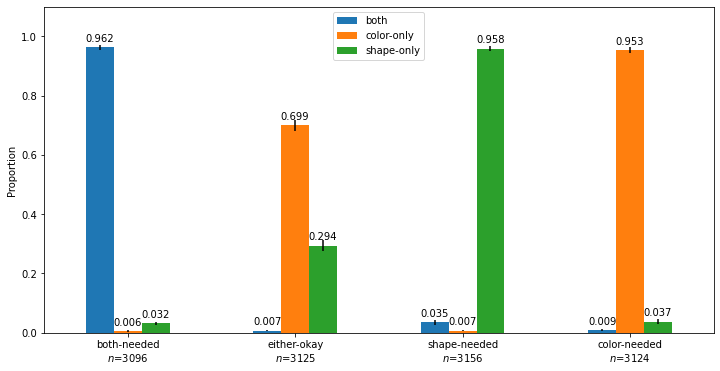

In [12]:
nonred_noncircle_dist = [eval_utils.analyze_vocab_dist(curr_speaker_results[listener_type], curr_speaker_results['all_referents'], lambda x: x[0] != 'red' and x[1] != 'circle') for curr_speaker_results in eval_results]
nonred_noncircle_dist_per_speaker = [vocab_dist_per_speaker['utterance_type'] for vocab_dist_per_speaker in nonred_noncircle_dist]
eval_utils.visualize_utterance_distribution(nonred_noncircle_dist_per_speaker)

# Accuracy

## Val listener

In [13]:
val_accuracy_per_speaker = [eval_utils.analyze_accuracy(curr_speaker_results['val'], curr_speaker_results['all_referents']) for curr_speaker_results in eval_results]

../../eval_utils.py:326: RuntimeWarning: invalid value encountered in true_divide
  incorrect_mean_maxprob_by_config /= num_incorrect_by_config


In [14]:
[val_accuracy['overall_accuracy'] for val_accuracy in val_accuracy_per_speaker]

[0.9267, 0.92745, 0.9202, 0.9315, 0.9328]

In [15]:
val_accuracy_per_speaker_by_condition = {}
for context in val_accuracy_per_speaker[0]['accuracy_by_context']:
    curr_context_acc = np.asarray([val_accuracy['accuracy_by_context'][context] for val_accuracy in val_accuracy_per_speaker])
    val_accuracy_per_speaker_by_condition[context] = curr_context_acc

aggregate_val_accuracy_by_condition = {condition: (np.mean(accs).round(4), np.std(accs).round(4)) for condition, accs in val_accuracy_per_speaker_by_condition.items()}

aggregate_val_accuracy_by_condition # each tuple is (mean, std)

{'both-needed': (0.9031, 0.0056),
 'either-okay': (0.974, 0.0019),
 'shape-needed': (0.8532, 0.0097),
 'color-needed': (0.9807, 0.0022)}

# QA 

In [16]:
from collections import Counter

In [17]:
speaker_idx = 0 # only looking at 1 speaker

shape_qa = eval_utils.qualitative_analysis('shape-needed', eval_results[speaker_idx]['val'], eval_results[speaker_idx]['all_referents'], num_examples=-1)
color_qa = eval_utils.qualitative_analysis('color-needed', eval_results[speaker_idx]['val'], eval_results[speaker_idx]['all_referents'], num_examples=-1)
either_qa = eval_utils.qualitative_analysis('either-okay', eval_results[speaker_idx]['val'], eval_results[speaker_idx]['all_referents'], num_examples=-1)

In [18]:
shape_qa

[{'pred': 0,
  'referents': ['green ellipse', 'green rectangle', 'green square'],
  'utterance': 'ellipse',
  'sem': array([1., 0., 0.], dtype=float32),
  'probs': array([0.576, 0.212, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['white rectangle', 'white square', 'white ellipse'],
  'utterance': 'rectangle',
  'sem': array([0.999, 0.018, 0.   ], dtype=float32),
  'probs': array([0.574, 0.215, 0.211], dtype=float32)},
 {'pred': 0,
  'referents': ['green circle', 'green rectangle', 'green square'],
  'utterance': 'circle',
  'sem': array([0.96, 0.  , 0.  ], dtype=float32),
  'probs': array([0.566, 0.217, 0.217], dtype=float32)},
 {'pred': 0,
  'referents': ['red circle', 'red square', 'red ellipse'],
  'utterance': 'circle',
  'sem': array([1.  , 0.  , 0.05], dtype=float32),
  'probs': array([0.57, 0.21, 0.22], dtype=float32)},
 {'pred': 0,
  'referents': ['yellow ellipse', 'yellow square', 'yellow circle'],
  'utterance': 'ellipse',
  'sem': array([1.   , 0.   , 0.037], dtype=

## in `shape-needed`, what are examples where color is mentioned?

In [19]:
both_filter_func = lambda x: any([s in x['utterance'] for s in eval_utils.SHAPES]) and any([c in x['utterance'] for c in eval_utils.COLORS])

In [20]:
filtered_shape_qa = list(filter(both_filter_func, shape_qa))
filtered_shape_qa[:8]

[{'pred': 1,
  'referents': ['green square', 'green rectangle', 'green circle'],
  'utterance': 'green rectangle',
  'sem': array([0.786, 0.999, 0.   ], dtype=float32),
  'probs': array([0.371, 0.459, 0.169], dtype=float32)},
 {'pred': 0,
  'referents': ['yellow ellipse', 'yellow rectangle', 'yellow circle'],
  'utterance': 'yellow ellipse',
  'sem': array([1., 0., 0.], dtype=float32),
  'probs': array([0.576, 0.212, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['blue ellipse', 'blue circle', 'blue rectangle'],
  'utterance': 'blue ellipse',
  'sem': array([1.   , 0.997, 0.   ], dtype=float32),
  'probs': array([0.423, 0.421, 0.156], dtype=float32)},
 {'pred': 1,
  'referents': ['green rectangle', 'green circle', 'green square'],
  'utterance': 'green circle',
  'sem': array([0.151, 1.   , 0.04 ], dtype=float32),
  'probs': array([0.236, 0.552, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['yellow circle', 'yellow ellipse', 'yellow rectangle'],
  'utterance': 'yellow ci

In [21]:
num_overmod_per_combo = Counter(map(lambda x:x['referents'][0], filtered_shape_qa))
num_overmod_per_combo.most_common()

[('yellow ellipse', 18),
 ('blue ellipse', 17),
 ('blue circle', 12),
 ('white ellipse', 10),
 ('green circle', 8),
 ('gray ellipse', 8),
 ('blue square', 7),
 ('red rectangle', 7),
 ('green square', 6),
 ('green rectangle', 6),
 ('white circle', 6),
 ('gray rectangle', 6),
 ('white square', 6),
 ('yellow circle', 5),
 ('red ellipse', 5),
 ('yellow rectangle', 5),
 ('blue rectangle', 4),
 ('red square', 4),
 ('green ellipse', 3),
 ('white rectangle', 3),
 ('red circle', 2),
 ('yellow square', 2),
 ('gray square', 1),
 ('gray circle', 1)]

### Aggregate all speakers 

#### Overmodification

In [22]:
perc_overmod_per_shape = {}
perc_overmod_per_color = {}
for speaker_results in eval_results:
    speaker_shape_qa = eval_utils.qualitative_analysis('shape-needed', speaker_results['val'], speaker_results['all_referents'], num_examples=-1)
    speaker_overmod_shape_qa = list(filter(both_filter_func, speaker_shape_qa))
    
    num_total_per_shape = Counter(map(lambda x:x['referents'][0].split()[1], speaker_shape_qa))
    num_overmod_per_shape = Counter(map(lambda x:x['referents'][0].split()[1], speaker_overmod_shape_qa))
    for shape, num_overmod in num_overmod_per_shape.items():
        num_total = num_total_per_shape[shape]
        if shape not in perc_overmod_per_shape: perc_overmod_per_shape[shape] = []
        perc_overmod_per_shape[shape].append(num_overmod / num_total)
    
    num_total_per_color = Counter(map(lambda x:x['referents'][0].split()[0], speaker_shape_qa))
    num_overmod_per_color = Counter(map(lambda x:x['referents'][0].split()[0], speaker_overmod_shape_qa))
    for color, num_overmod in num_overmod_per_color.items():
        num_total = num_total_per_color[color]
        if color not in perc_overmod_per_color: perc_overmod_per_color[color] = []
        perc_overmod_per_color[color].append(num_overmod / num_total)

    

In [23]:
for shape in perc_overmod_per_shape:
    perc_overmod_per_shape[shape] = (np.mean(perc_overmod_per_shape[shape]), np.std(perc_overmod_per_shape[shape]))

In [31]:
{key: np.round(val, 4) for key, val in sorted(perc_overmod_per_shape.items(), key=lambda x: x[1][0], reverse=True)}

{'ellipse': array([0.044 , 0.0075]),
 'rectangle': array([0.0312, 0.0102]),
 'circle': array([0.0264, 0.0093]),
 'square': array([0.0252, 0.0066])}

In [25]:
for color in perc_overmod_per_color:
    perc_overmod_per_color[color] = (np.mean(perc_overmod_per_color[color]), np.std(perc_overmod_per_color[color]))

In [30]:
{key: np.round(val, 4) for key, val in sorted(perc_overmod_per_color.items(), key=lambda x: x[1][0], reverse=True)}

{'green': array([0.0421, 0.0106]),
 'blue': array([0.0372, 0.0173]),
 'yellow': array([0.0334, 0.0044]),
 'white': array([0.0287, 0.0087]),
 'red': array([0.0253, 0.0083]),
 'gray': array([0.0243, 0.0144])}

#### Accuracy by shape

In [27]:
accuracy_per_shape = {shape: [] for shape in perc_overmod_per_shape}
for speaker_results in eval_results:
    speaker_shape_qa = eval_utils.qualitative_analysis('shape-needed', speaker_results['val'], speaker_results['all_referents'], num_examples=-1)
    for shape in accuracy_per_shape:
        curr_shape_qa = [e for e in speaker_shape_qa if e['referents'][0].split()[1] == shape]
        num_correct = len([e for e in curr_shape_qa if e['pred'] == 0])
        acc = num_correct / len(curr_shape_qa)
        accuracy_per_shape[shape].append(acc)
    

In [28]:
for shape in accuracy_per_shape:
    accuracy_per_shape[shape] = (np.mean(accuracy_per_shape[shape]), np.std(accuracy_per_shape[shape]))

In [29]:
accuracy_per_shape

{'square': (0.8852300242130751, 0.014205004035512513),
 'ellipse': (0.7715864246250987, 0.01026167195778689),
 'rectangle': (0.8926400000000001, 0.012325193710445288),
 'circle': (0.864790996784566, 0.013222434208972416)}

## in `color-needed`, what are examples where shape is mentioned 

In [22]:
# in color-needed, what are examples where color is mentioned
filtered_color_qa = list(filter(both_filter_func, color_qa))
filtered_color_qa[:8]

[{'pred': 0,
  'referents': ['white rectangle', 'blue rectangle', 'green rectangle'],
  'utterance': 'white rectangle',
  'sem': array([0., 0., 0.], dtype=float32),
  'probs': array([0.333, 0.333, 0.333], dtype=float32)},
 {'pred': 0,
  'referents': ['blue circle', 'red circle', 'green circle'],
  'utterance': 'blue circle',
  'sem': array([1.   , 0.599, 0.   ], dtype=float32),
  'probs': array([0.491, 0.329, 0.181], dtype=float32)},
 {'pred': 0,
  'referents': ['white square', 'blue square', 'red square'],
  'utterance': 'white square',
  'sem': array([1., 0., 0.], dtype=float32),
  'probs': array([0.576, 0.212, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['white ellipse', 'green ellipse', 'yellow ellipse'],
  'utterance': 'white ellipse',
  'sem': array([1., 0., 0.], dtype=float32),
  'probs': array([0.576, 0.212, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['yellow rectangle', 'blue rectangle', 'white rectangle'],
  'utterance': 'yellow rectangle',
  'sem': array([

In [23]:
Counter(map(lambda x:x['referents'][0], filtered_color_qa)).most_common()

[('gray square', 53),
 ('gray rectangle', 51),
 ('white ellipse', 35),
 ('white circle', 18),
 ('white square', 14),
 ('white rectangle', 13),
 ('yellow circle', 8),
 ('red square', 7),
 ('gray ellipse', 7),
 ('green rectangle', 6),
 ('yellow square', 6),
 ('gray circle', 5),
 ('yellow ellipse', 4),
 ('red rectangle', 4),
 ('blue rectangle', 3),
 ('blue square', 3),
 ('yellow rectangle', 2),
 ('red circle', 2),
 ('blue circle', 1),
 ('green ellipse', 1),
 ('red ellipse', 1),
 ('green square', 1)]

## in `either-okay` 

### mentions color, no shape 

In [24]:
color_only_filter_func = lambda x: any([c in x['utterance'] for c in eval_utils.COLORS]) and all([s not in x['utterance'] for s in eval_utils.SHAPES])

color_only_filtered_qa = list(filter(color_only_filter_func, either_qa))

Counter(map(lambda x:x['referents'][0], color_only_filtered_qa)).most_common()

[('blue ellipse', 222),
 ('blue circle', 220),
 ('green circle', 210),
 ('red circle', 204),
 ('green rectangle', 201),
 ('red ellipse', 197),
 ('green ellipse', 197),
 ('yellow ellipse', 191),
 ('green square', 187),
 ('yellow circle', 186),
 ('red rectangle', 181),
 ('gray ellipse', 176),
 ('blue square', 174),
 ('blue rectangle', 167),
 ('white circle', 167),
 ('red square', 167),
 ('yellow rectangle', 160),
 ('white ellipse', 160),
 ('white rectangle', 153),
 ('yellow square', 144),
 ('gray circle', 142),
 ('white square', 137),
 ('gray rectangle', 126),
 ('gray square', 85)]

In [25]:
color_only_filtered_qa[:8]

[{'pred': 0,
  'referents': ['yellow ellipse', 'gray square', 'white rectangle'],
  'utterance': 'yellow shape',
  'sem': array([1., 0., 0.], dtype=float32),
  'probs': array([0.576, 0.212, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['yellow rectangle', 'green ellipse', 'red ellipse'],
  'utterance': 'yellow shape',
  'sem': array([1.   , 0.001, 0.   ], dtype=float32),
  'probs': array([0.576, 0.212, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['green square', 'gray ellipse', 'yellow rectangle'],
  'utterance': 'green shape',
  'sem': array([1., 0., 0.], dtype=float32),
  'probs': array([0.576, 0.212, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['red circle', 'gray ellipse', 'green ellipse'],
  'utterance': 'red',
  'sem': array([1., 0., 0.], dtype=float32),
  'probs': array([0.576, 0.212, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['red rectangle', 'gray ellipse', 'gray circle'],
  'utterance': 'red shape',
  'sem': array([1., 0., 0.], dtype=float

### mentions shape, but no color 

In [26]:
shape_only_filter_func = lambda x: any([s in x['utterance'] for s in eval_utils.SHAPES]) and all([c not in x['utterance'] for c in eval_utils.COLORS])

shape_only_filtered_qa = list(filter(shape_only_filter_func, either_qa))

Counter(map(lambda x:x['referents'][0], shape_only_filtered_qa)).most_common()

[('gray square', 46),
 ('gray rectangle', 41),
 ('white square', 34),
 ('green square', 28),
 ('yellow square', 26),
 ('yellow rectangle', 21),
 ('white circle', 20),
 ('red square', 18),
 ('blue rectangle', 14),
 ('white rectangle', 14),
 ('white ellipse', 13),
 ('blue square', 11),
 ('red rectangle', 10),
 ('gray circle', 7),
 ('green rectangle', 6),
 ('yellow circle', 6),
 ('yellow ellipse', 5),
 ('red circle', 3),
 ('green circle', 2),
 ('gray ellipse', 2)]

In [27]:
shape_only_filtered_qa[:8]

[{'pred': 0,
  'referents': ['blue square', 'white ellipse', 'gray circle'],
  'utterance': 'square',
  'sem': array([0.905, 0.   , 0.004], dtype=float32),
  'probs': array([0.552, 0.223, 0.224], dtype=float32)},
 {'pred': 0,
  'referents': ['red rectangle', 'white ellipse', 'blue circle'],
  'utterance': 'rectangle',
  'sem': array([1., 0., 0.], dtype=float32),
  'probs': array([0.576, 0.212, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['gray square', 'blue ellipse', 'blue circle'],
  'utterance': 'square',
  'sem': array([1., 0., 0.], dtype=float32),
  'probs': array([0.576, 0.212, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['white circle', 'green square', 'gray square'],
  'utterance': 'circle',
  'sem': array([1., 0., 0.], dtype=float32),
  'probs': array([0.576, 0.212, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['red rectangle', 'blue circle', 'blue ellipse'],
  'utterance': 'rectangle',
  'sem': array([1., 0., 0.], dtype=float32),
  'probs': array([0.

## mentions both color and shape 

In [28]:
both_present_filter_func = lambda x: any([s in x['utterance'] for s in eval_utils.SHAPES]) and any([c in x['utterance'] for c in eval_utils.COLORS])

both_present_filtered_qa = list(filter(both_present_filter_func, either_qa))

Counter(map(lambda x:x['referents'][0], shape_only_filtered_qa)).most_common()

[('gray square', 46),
 ('gray rectangle', 41),
 ('white square', 34),
 ('green square', 28),
 ('yellow square', 26),
 ('yellow rectangle', 21),
 ('white circle', 20),
 ('red square', 18),
 ('blue rectangle', 14),
 ('white rectangle', 14),
 ('white ellipse', 13),
 ('blue square', 11),
 ('red rectangle', 10),
 ('gray circle', 7),
 ('green rectangle', 6),
 ('yellow circle', 6),
 ('yellow ellipse', 5),
 ('red circle', 3),
 ('green circle', 2),
 ('gray ellipse', 2)]

In [29]:
qa = eval_utils.qualitative_analysis('both-needed', eval_results[speaker_idx]['val'], eval_results[speaker_idx]['all_referents'], num_examples=-1)

In [30]:
filter_func = lambda x: 'white' in x['referents'][0] and 'gray' in x['utterance']

In [31]:
list(filter(filter_func, qa))

[{'pred': 2,
  'referents': ['white circle', 'blue circle', 'white ellipse'],
  'utterance': 'gray circle',
  'sem': array([0.   , 0.   , 0.991], dtype=float32),
  'probs': array([0.213, 0.213, 0.574], dtype=float32)},
 {'pred': 0,
  'referents': ['white ellipse', 'green ellipse', 'white circle'],
  'utterance': 'gray ellipse',
  'sem': array([1.   , 0.644, 0.   ], dtype=float32),
  'probs': array([0.484, 0.339, 0.178], dtype=float32)},
 {'pred': 0,
  'referents': ['white circle', 'blue circle', 'white ellipse'],
  'utterance': 'gray ellipse',
  'sem': array([0.041, 0.   , 0.   ], dtype=float32),
  'probs': array([0.342, 0.329, 0.329], dtype=float32)},
 {'pred': 2,
  'referents': ['white circle', 'yellow circle', 'white ellipse'],
  'utterance': 'gray circle',
  'sem': array([0., 0., 1.], dtype=float32),
  'probs': array([0.212, 0.212, 0.576], dtype=float32)},
 {'pred': 0,
  'referents': ['white ellipse', 'yellow ellipse', 'white square'],
  'utterance': 'gray ellipse',
  'sem': array(